In [15]:
# Understand the data, identify key drivers of churn, and prepare insights for feature engineering.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# --- 1. DATA LOADING ---
print("--- 1. DATA LOADING ---\n")
try:
    df = pd.read_csv('cleaned_telco_churn_data.csv')
    print(f"Loaded cleaned data with {df.shape[0]} rows and {df.shape[1]} features.")
    print("DataFrame Info (Post-Cleaning):\n")
    df.info()
except FileNotFoundError:
    print("Error: 'cleaned_telco_churn_data.csv' not found. Please run 'data_cleaning.py' first.")
    # Exit or create a dummy dataframe to proceed if necessary
    exit()

# Separate Numerical and Categorical Columns (excluding 'Churn')
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = df.drop(columns=['Churn'] + numerical_cols).columns.tolist()
print(f"\nNumerical features: {numerical_cols}")
print(f"\nCategorical features: {categorical_cols}")

--- 1. DATA LOADING ---

Loaded cleaned data with 7032 rows and 20 features.
DataFrame Info (Post-Cleaning):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non


--- 2. UNIVARIATE ANALYSIS: Understanding Distributions ---

2.1. Target Variable (Churn) Distribution:
0    73.42%
1    26.58%
Name: Churn, dtype: object


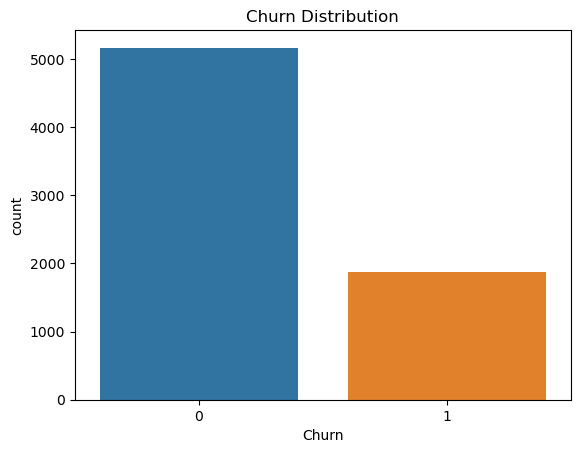

In [17]:
print("\n--- 2. UNIVARIATE ANALYSIS: Understanding Distributions ---")

# 2.1. Target Variable Distribution (Churn)
print("\n2.1. Target Variable (Churn) Distribution:")
print(df['Churn'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()



2.2. Numerical Feature Descriptive Statistics:
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


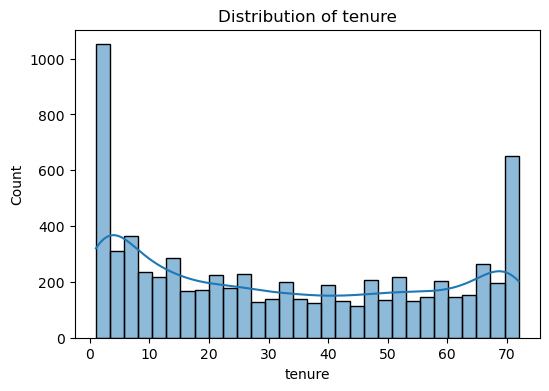

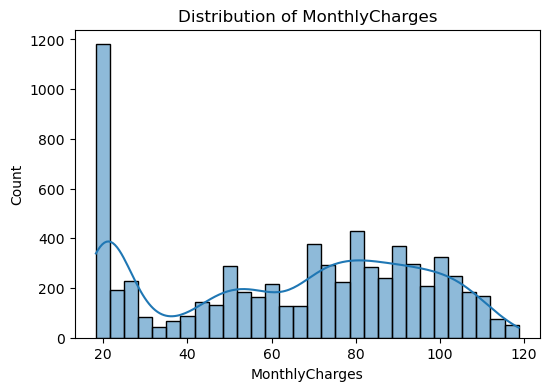

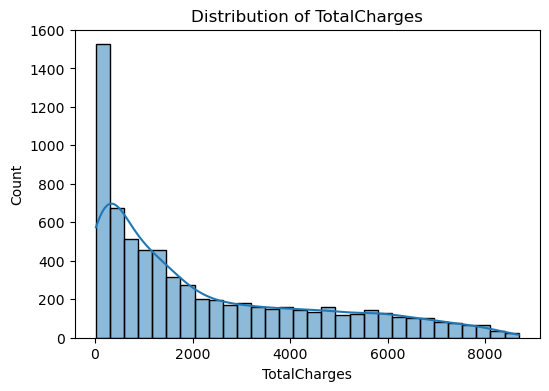

In [18]:
# Observation: The data is highly imbalanced (~27% churn), which will require special attention during modeling

# 2.2. Numerical Feature Distributions
print("\n2.2. Numerical Feature Descriptive Statistics:")
print(df[numerical_cols].describe())

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [19]:
# Numerical Feature Distribution Overview:
print("\nVisualizations: Histograms/KDE plots for Numerical Features:\n")
print("1. 'tenure' shows a bimodal distribution, with sharp peaks at early tenure (0–1 months) and long-term customers (70+ months).")
print("2. 'MonthlyCharges' distribution is slightly bimodal, with one cluster at the lower range (~20) and another spread across mid-to-high values (60–100).")
print("3. 'TotalCharges' is right-skewed, reflecting the dependency on 'tenure'—new customers have low charges, while long-term customers accumulate higher charges.")



Visualizations: Histograms/KDE plots for Numerical Features:

1. 'tenure' shows a bimodal distribution, with sharp peaks at early tenure (0–1 months) and long-term customers (70+ months).
2. 'MonthlyCharges' distribution is slightly bimodal, with one cluster at the lower range (~20) and another spread across mid-to-high values (60–100).
3. 'TotalCharges' is right-skewed, reflecting the dependency on 'tenure'—new customers have low charges, while long-term customers accumulate higher charges.



--- 3. BIVARIATE ANALYSIS: Churn vs. Features ---

3.1. Numerical Features vs. Churn (Mean values by Churn class):
          tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.650010       61.307408   2555.344141
1      17.979133       74.441332   1531.796094


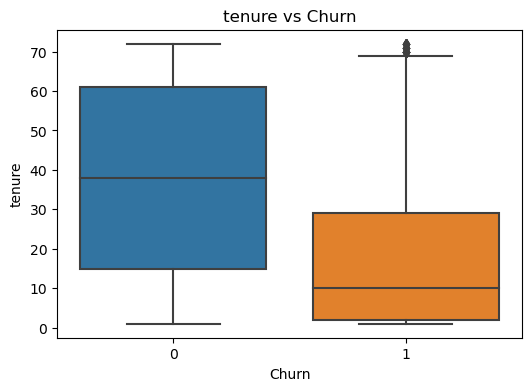

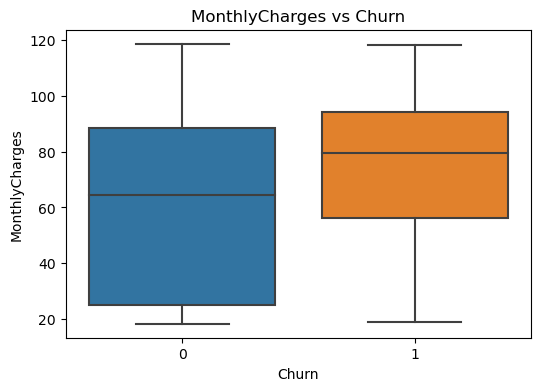

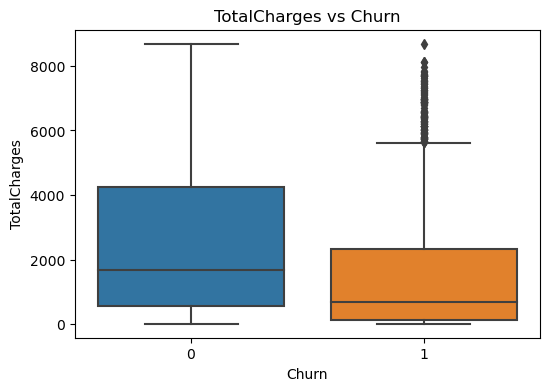

In [20]:
# --- 3. BIVARIATE ANALYSIS (Churn Drivers) ---
print("\n--- 3. BIVARIATE ANALYSIS: Churn vs. Features ---")

# Numerical vs Churn
print("\n3.1. Numerical Features vs. Churn (Mean values by Churn class):")
print(df.groupby('Churn')[numerical_cols].mean())

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


3.2. Categorical Features vs. Churn (Churn Rate by Category):

--- gender ---
gender
Female    26.96%
Male      26.20%
Name: Churn, dtype: object


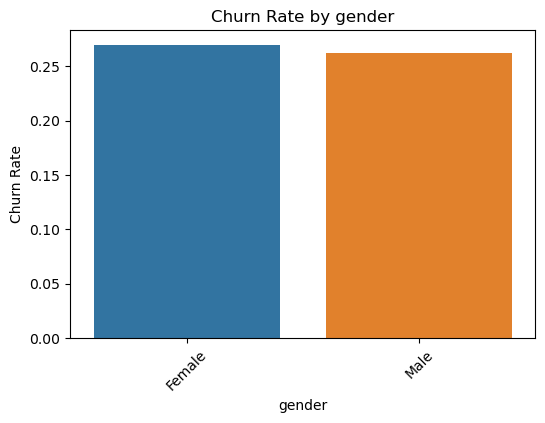


--- SeniorCitizen ---
SeniorCitizen
1    41.68%
0    23.65%
Name: Churn, dtype: object


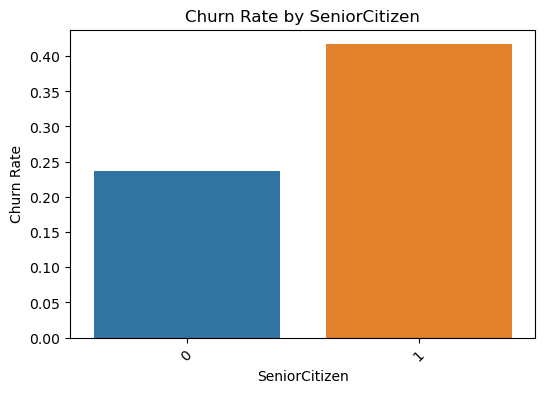


--- Partner ---
Partner
No     32.98%
Yes    19.72%
Name: Churn, dtype: object


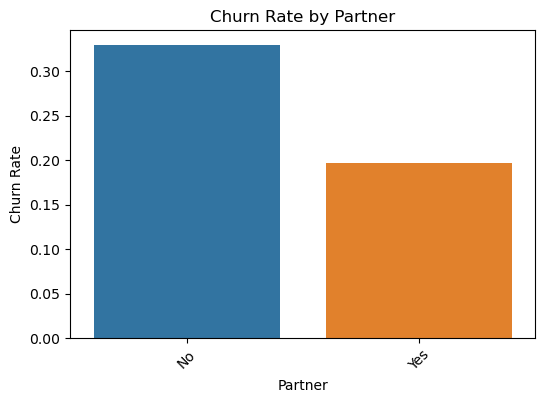


--- Dependents ---
Dependents
No     31.28%
Yes    15.53%
Name: Churn, dtype: object


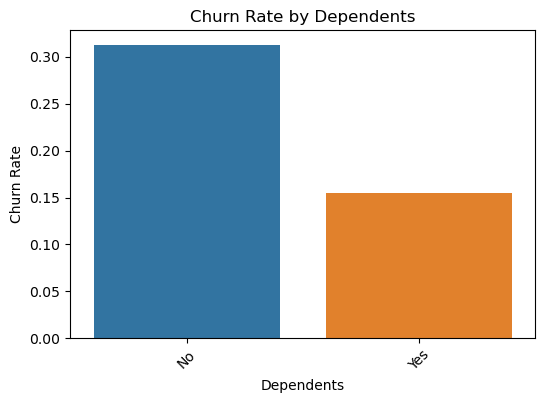


--- PhoneService ---
PhoneService
Yes    26.75%
No     25.00%
Name: Churn, dtype: object


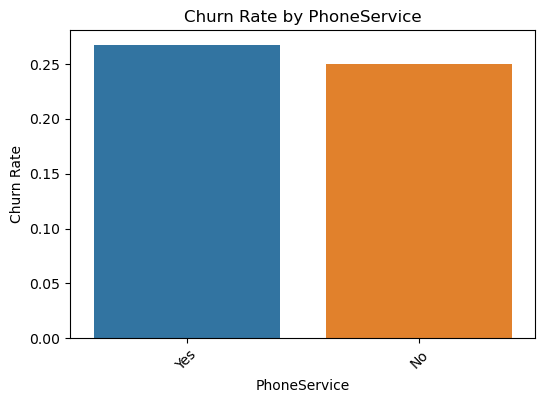


--- MultipleLines ---
MultipleLines
Yes                 28.65%
No                  25.08%
No phone service    25.00%
Name: Churn, dtype: object


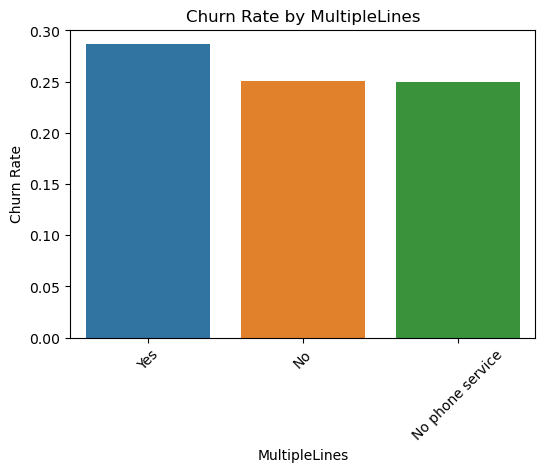


--- InternetService ---
InternetService
Fiber optic    41.89%
DSL            19.00%
No              7.43%
Name: Churn, dtype: object


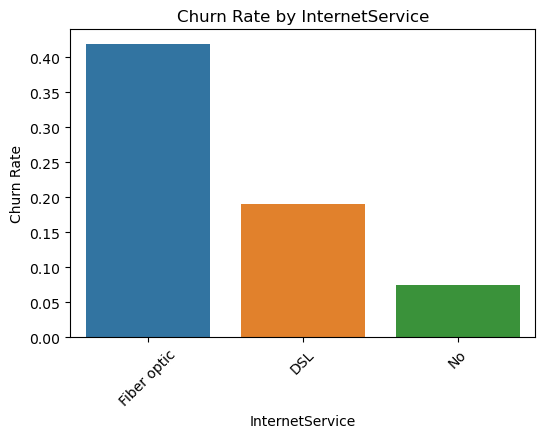


--- OnlineSecurity ---
OnlineSecurity
No                     41.78%
Yes                    14.64%
No internet service     7.43%
Name: Churn, dtype: object


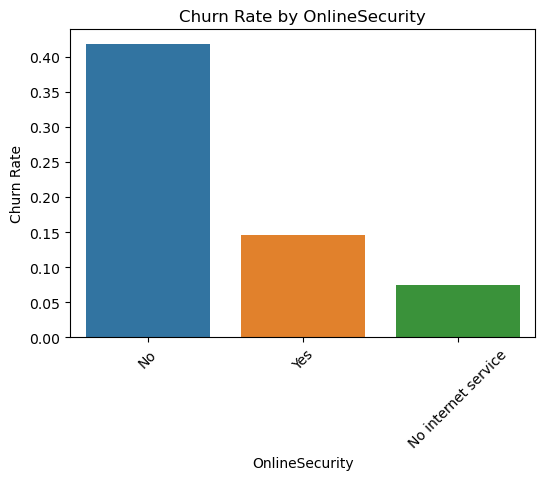


--- OnlineBackup ---
OnlineBackup
No                     39.94%
Yes                    21.57%
No internet service     7.43%
Name: Churn, dtype: object


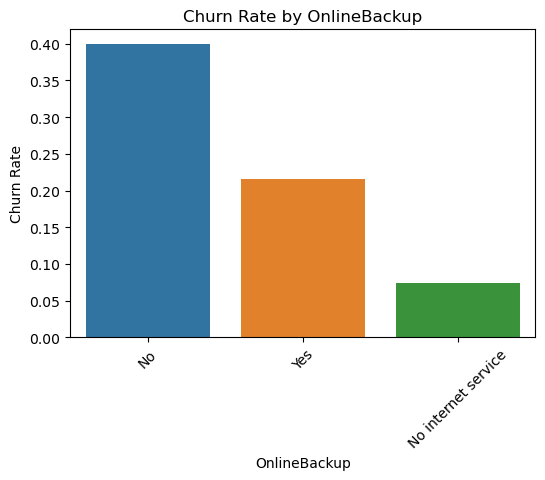


--- DeviceProtection ---
DeviceProtection
No                     39.14%
Yes                    22.54%
No internet service     7.43%
Name: Churn, dtype: object


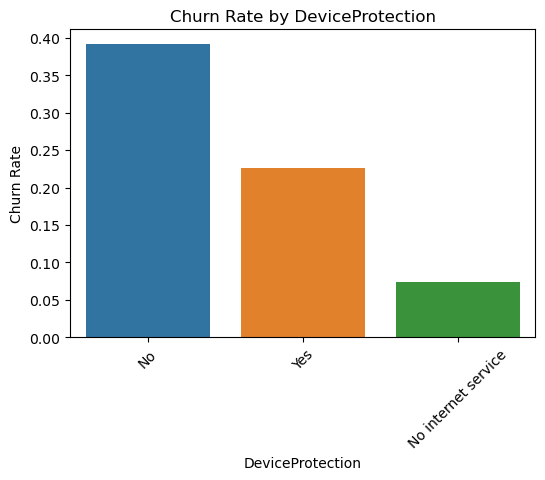


--- TechSupport ---
TechSupport
No                     41.65%
Yes                    15.20%
No internet service     7.43%
Name: Churn, dtype: object


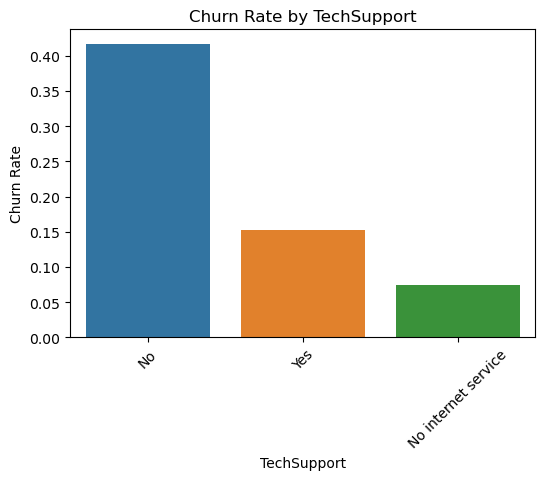


--- StreamingTV ---
StreamingTV
No                     33.54%
Yes                    30.11%
No internet service     7.43%
Name: Churn, dtype: object


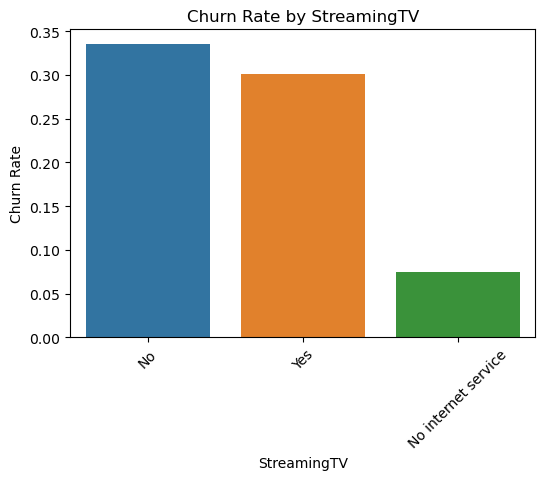


--- StreamingMovies ---
StreamingMovies
No                     33.73%
Yes                    29.95%
No internet service     7.43%
Name: Churn, dtype: object


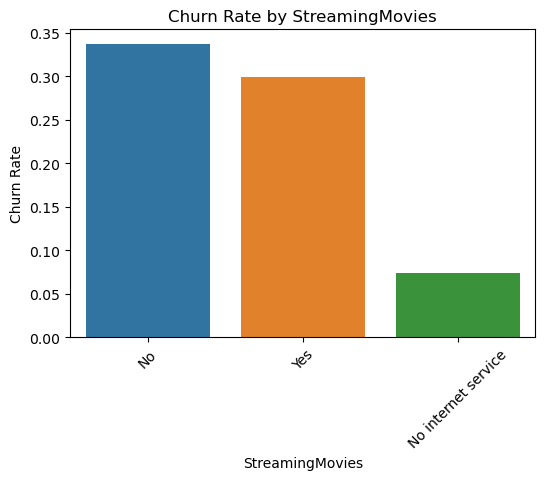


--- Contract ---
Contract
Month-to-month    42.71%
One year          11.28%
Two year           2.85%
Name: Churn, dtype: object


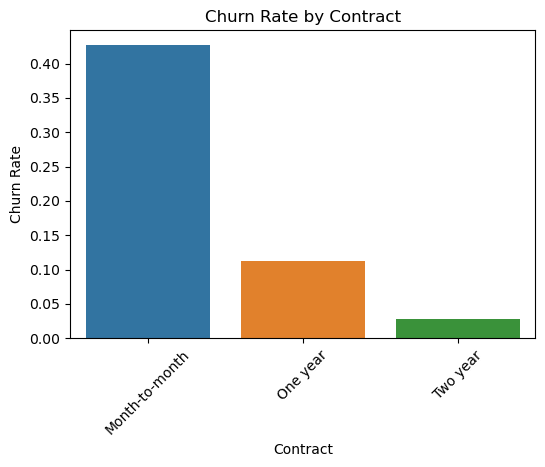


--- PaperlessBilling ---
PaperlessBilling
Yes    33.59%
No     16.38%
Name: Churn, dtype: object


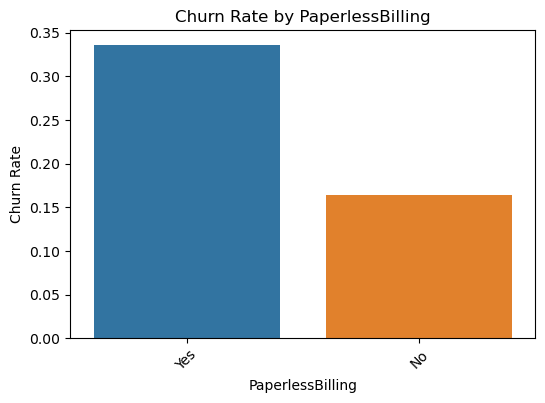


--- PaymentMethod ---
PaymentMethod
Electronic check             45.29%
Mailed check                 19.20%
Bank transfer (automatic)    16.73%
Credit card (automatic)      15.25%
Name: Churn, dtype: object


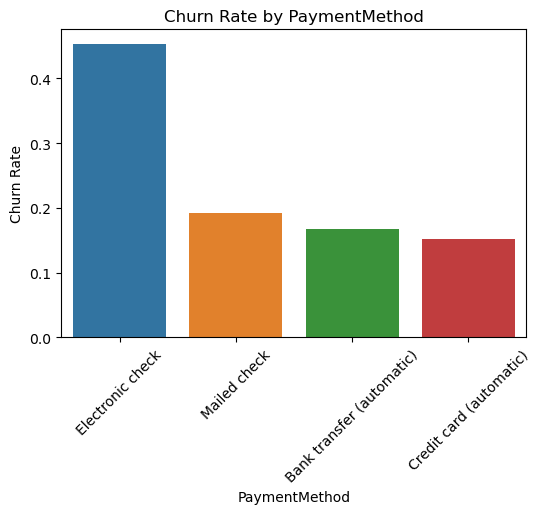

In [21]:
# Categorical vs Churn
print("\n3.2. Categorical Features vs. Churn (Churn Rate by Category):")
for col in categorical_cols:
    churn_rates = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    print(f"\n--- {col} ---")
    print(churn_rates.apply(lambda x: f"{x:.2%}"))
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=churn_rates.index, y=churn_rates.values)
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Churn Rate")
    plt.show()

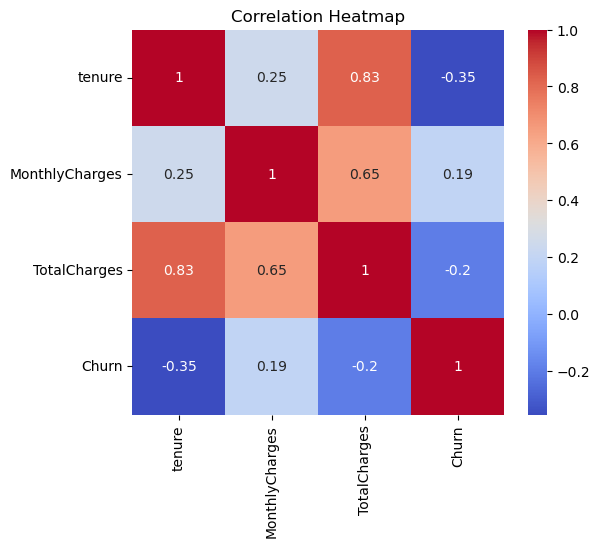

In [22]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols + ['Churn']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols + ['Churn']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Observation:
print("Correlation Matrix (Numerical Features):\n")
print(correlation_matrix.round(2))
print("  High Multicollinearity: 'tenure' and 'TotalCharges' show an extremely high correlation (0.83).")
print("  Action: For linear models (Logistic Regression, etc.), one of these features may need to be dropped or dimensionality reduction (e.g., PCA) applied. Tree-based models are less sensitive to this issue.")

# --- 5. KEY FINDINGS SUMMARY (Communication) ---
print("\n\n#############################################")
print("--- STAGE 2: EDA KEY FINDINGS & INSIGHTS ---")
print("#############################################")
print("1. Strongest Predictors Identified: 'Contract Type' (Month-to-month) and 'tenure' (low values) emerge as key churn drivers.")
print("2. Imbalance: The churn target variable is imbalanced (~26% churn), requiring resampling or adjusted evaluation metrics.")
print("3. High-Risk Segments: Fiber optic customers, those without add-on security/support services, and Month-to-month subscribers are at significantly higher risk of churn.")
print("4. Multicollinearity: Strong correlation detected between 'tenure' and 'TotalCharges' (0.83).")
print("5. Initial Hypothesis: Churn is largely influenced by commitment level (contract type) and early dissatisfaction (short tenure, high monthly charges for fiber optic users).")

print("\nEDA is complete. The data structure and key churn drivers are now well-understood.")


Correlation Matrix (Numerical Features):

                tenure  MonthlyCharges  TotalCharges  Churn
tenure            1.00            0.25          0.83  -0.35
MonthlyCharges    0.25            1.00          0.65   0.19
TotalCharges      0.83            0.65          1.00  -0.20
Churn            -0.35            0.19         -0.20   1.00
  High Multicollinearity: 'tenure' and 'TotalCharges' show an extremely high correlation (0.83).
  Action: For linear models (Logistic Regression, etc.), one of these features may need to be dropped or dimensionality reduction (e.g., PCA) applied. Tree-based models are less sensitive to this issue.


#############################################
--- STAGE 2: EDA KEY FINDINGS & INSIGHTS ---
#############################################
1. Strongest Predictors Identified: 'Contract Type' (Month-to-month) and 'tenure' (low values) emerge as key churn drivers.
2. Imbalance: The churn target variable is imbalanced (~26% churn), requiring resampling or adj